In [2]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, zscore
import matplotlib.pyplot as plt
import seaborn as sns
import os

# os.chdir("D:/Algorithmic-Fairness-Interpretability/afi_final_project")

In [33]:
df = pd.read_csv("predictions_output_xgboost.csv")

In [35]:
df.head(20)

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Group,Predicted_PD,True_Label
0,2,22,8900,8900,0,60,0.084828,0,0,0,0,0.282660,1
1,0,55,10400,9400,0,72,0.083889,0,0,0,0,0.332070,0
2,1,40,15990,14990,0,60,0.127142,0,1,0,0,0.281991,1
3,5,43,19999,23233,0,72,0.153289,0,0,0,0,0.406785,0
4,1,26,11800,4298,1,24,0.115528,0,0,0,0,0.061300,0
5,3,21,10090,11948,0,60,0.138462,0,0,0,0,0.521391,0
6,14,52,9400,9400,0,24,0.080952,0,0,1,0,0.101651,0
7,4,58,11504,12041,0,36,0.088750,0,1,1,0,0.097160,0
8,5,58,20660,22237,0,60,0.162222,0,1,1,0,0.150662,0
9,0,20,22990,25703,0,96,0.273636,0,0,1,0,0.585812,1


<Axes: >

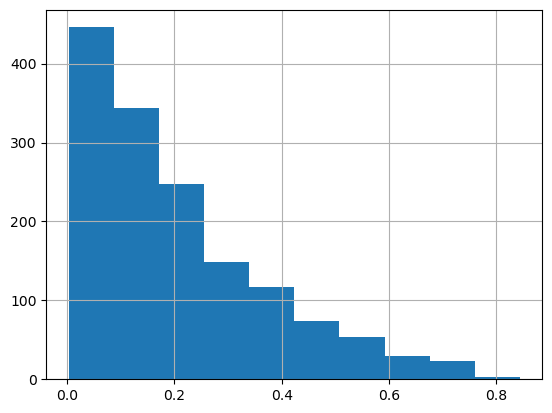

In [21]:
df['Predicted_PD'].hist()

In [24]:
df["Predicted_Positive"].value_counts()

False    1374
True      112
Name: Predicted_Positive, dtype: int64

In [23]:
df["Predicted_Positive"] = df["Predicted_PD"] > 0.5

grouped_table = pd.crosstab(
    index=df["Group"], columns=df["Predicted_Positive"], margins=False
)
grouped_table["Total"] = grouped_table.sum(axis=1)

In [8]:
# Statistical Parity Test
chi2_stat_parity, p_value_parity, dof_parity, expected_parity = chi2_contingency(
    grouped_table
)

print("Statistical Parity Table:")
print(grouped_table)
print(
    f"\nChi-squared Statistic: {chi2_stat_parity:.4f}, p-value: {p_value_parity:.4f}\n"
)

Statistical Parity Table:
Predicted_Positive  False  True  Total
Group                                 
0                    1378   176   1554
1                     675     0    675

Chi-squared Statistic: 83.0016, p-value: 0.0000



In [27]:
# Conditional Statistical Parity (including True_Label)
cond_table = pd.crosstab(
    index=[df["Group"], df["True_Label"]],
    columns=df["Predicted_Positive"],
    margins=False,
)
cond_table["Total"] = cond_table.sum(axis=1)

# Conditional Statistical Parity Test
chi2_cond_parity, p_value_cond_parity, dof_cond_parity, expected_cond_parity = (
    chi2_contingency(cond_table)
)

print("Conditional Statistical Parity Table:")
print(cond_table)
print(
    f"\nConditional Chi-squared Statistic: {chi2_cond_parity:.4f}, p-value: {p_value_cond_parity:.4f}\n"
)

Conditional Statistical Parity Table:
Predicted_Positive  False  True  Total
Group True_Label                      
0     0              1104    71   1175
      1               274   105    379
1     0               613     0    613
      1                62     0     62

Conditional Chi-squared Statistic: 267.9025, p-value: 0.0000



In [29]:
print("Grouped Table for Statistical Parity:")
print(grouped_table)

Grouped Table for Statistical Parity:
Predicted_Positive  False  True  Total
Group                                 
0                    1378   176   1554
1                     675     0    675


C:\Users\Catalina\AppData\Local\Temp\ipykernel_16104\85213973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Catalina\AppData\Local\Temp\ipykernel_16104\85213973.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


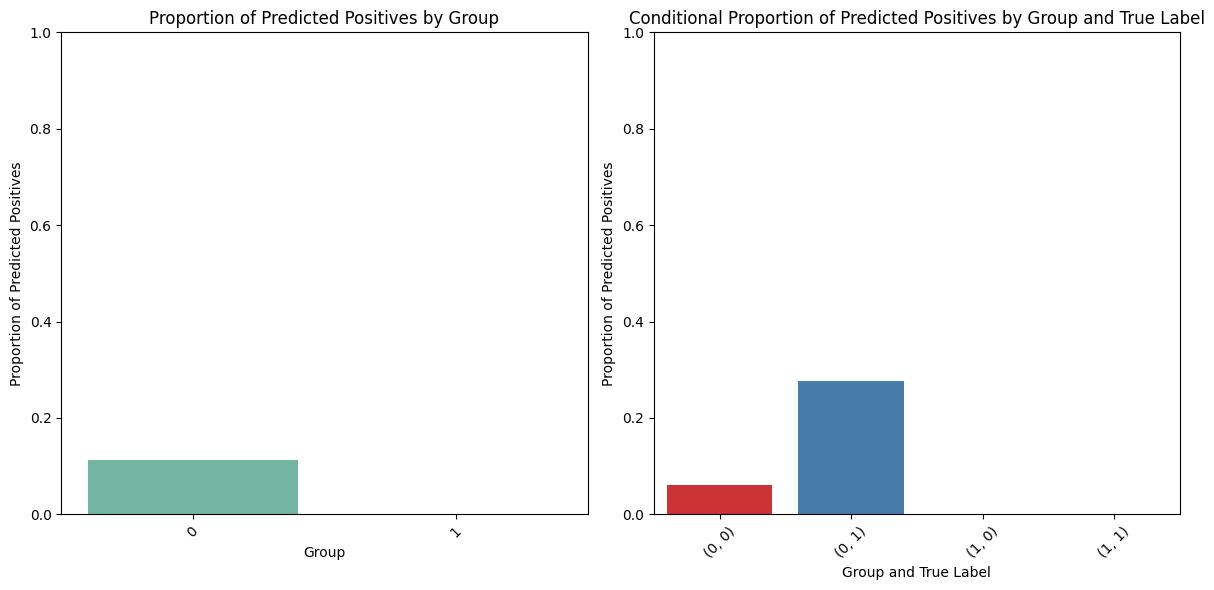

In [28]:
plt.figure(figsize=(12, 6))

# Bar plot for Statistical Parity
plt.subplot(1, 2, 1)
sns.barplot(
    x=grouped_table.index.map(str),
    y=grouped_table[True] / grouped_table["Total"],
    palette="Set2",
)
plt.title("Proportion of Predicted Positives by Group")
plt.ylabel("Proportion of Predicted Positives")
plt.xlabel("Group")
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Bar plot for Conditional Statistical Parity
plt.subplot(1, 2, 2)
sns.barplot(
    x=cond_table.index.map(str),
    y=cond_table[True] / cond_table["Total"],
    palette="Set1",
)
plt.title("Conditional Proportion of Predicted Positives by Group and True Label")
plt.ylabel("Proportion of Predicted Positives")
plt.xlabel("Group and True Label")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()